In [1]:
import matplotlib.pyplot as plt
import numpy as np

Baixando uma série temporal de PPG por smartphone
  - **[Silva et al. 2023] Silva, D. F., de M. Júnior, J. G. B., Domingues, L V., and Mazzu Nascimento, T. (2023). Hemoglobin estimation from smartphone-based photoplethysmography with small data. In Computer-Based Medical Systems.**

In [2]:
!gdown 1Wh3Jpc5GQQtfkqkbsreyuFVFDRsX9a9D

Downloading...
From: https://drive.google.com/uc?id=1Wh3Jpc5GQQtfkqkbsreyuFVFDRsX9a9D
To: /content/dd_r
100% 22.5k/22.5k [00:00<00:00, 44.4MB/s]


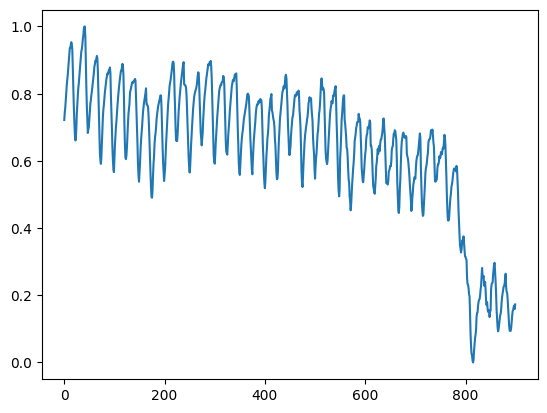

In [3]:
ts = np.genfromtxt('dd_r', delimiter='\t')
plt.plot(ts)

Há uma sazonalidade, mas qual é o tamanho?
Uma abordagem comum é fazer o detrend primeiro, para facilitar a visualização.

In [ ]:
from statsmodels.tsa.tsatools import detrend
dts = detrend(ts, order=1)

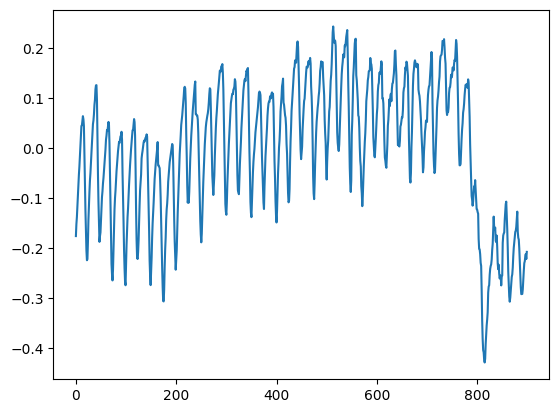

In [ ]:
plt.plot(dts)

Famos fazer o detrend por moving average

In [ ]:
def detrend_ma_coxa(ts, size=12):

  ts2 = np.empty(ts.shape)

  for i in range(ts.size):

    ini = max(0, i - int(size/2))
    fim = min(len(ts), i + int(size/2))

    ts2[i] = np.mean(ts[ini:fim])

  return ts2


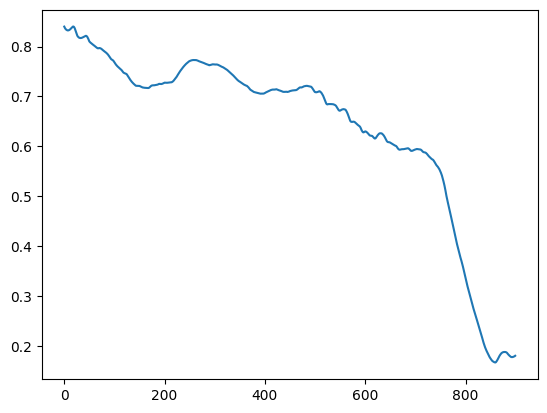

In [ ]:
ts_detrended = detrend_ma_coxa(ts, 100)
plt.plot(ts_detrended)

Vamos plotar com e sem a tendência

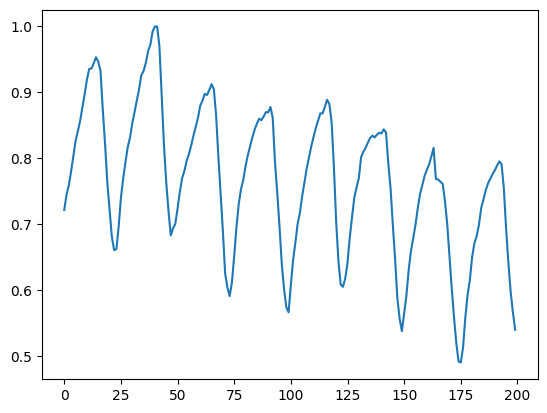

In [ ]:
plt.plot(ts[:200])

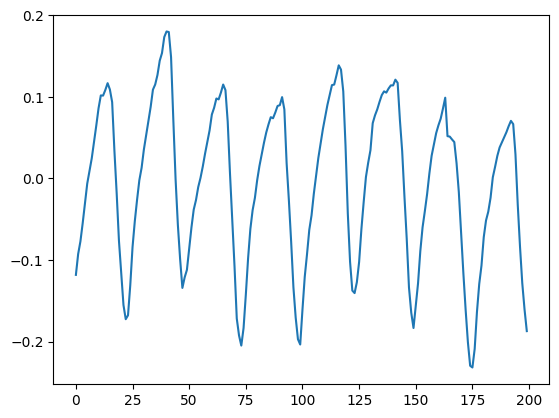

In [ ]:
plt.plot(ts[:200]-ts_detrended[:200])

###PAUSA PARA REFLETIR RSS#

A sazonalidade é dada pela média de agrupamentos das observações

In [ ]:
def sazonalidade_coxa(ts, size=25):

  ts2 = np.empty(ts.shape)

  for i in range(0, size):
    obs = list(range(i,ts.size,size))
    ts2[obs] = np.mean(ts[obs])

  return ts2

In [ ]:
ts_season = sazonalidade_coxa(ts-ts_detrended, 25)

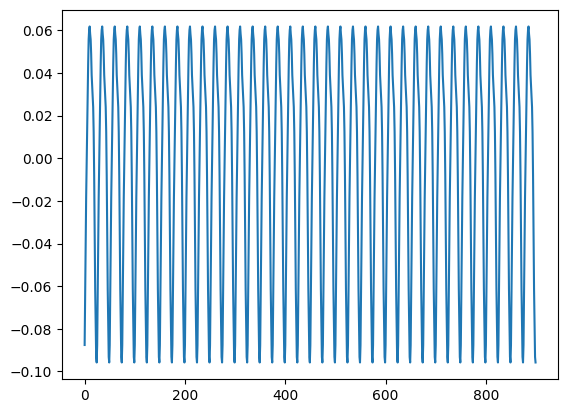

In [ ]:
plt.plot(ts_season)

# Utilizando o statsmodel para decompor a série (por moving averages)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose # decomposição por moving averages

<Figure size 600x900 with 0 Axes>

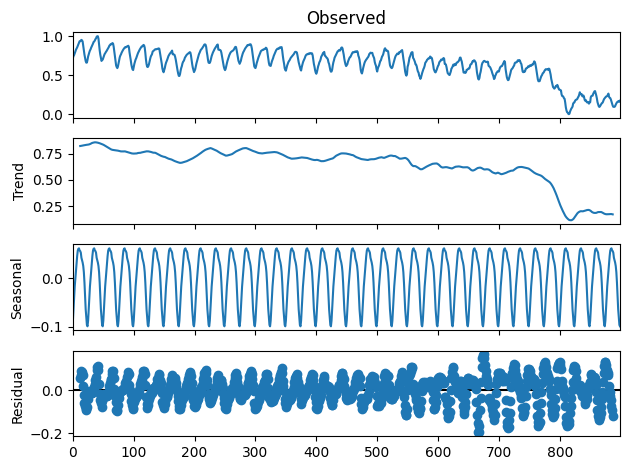

In [ ]:
result = seasonal_decompose(ts,
                            model='additive',
                            period=25)

plt.figure(figsize=[6,9])
result.plot()
plt.show()

In [6]:
from statsmodels.tsa.seasonal import STL
import pandas as pd

model = STL(pd.Series(ts), seasonal=25)
result = model.fit()

plt.figure(figsize=[6,9])
result.plot()
plt.show()

ValueError: ignored